In [14]:
#this will use the GPU if you have it enabled to work with TensorFlow
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout
import matplotlib.pyplot as plt


# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy

from sklearn.decomposition import PCA

In [11]:
# dimensions of our images.
img_width, img_height = 150, 150

#the directories where our train and test data is
train_data_dir = 'woodroad/train'
validation_data_dir = 'woodroad/test'

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32
number_train_examples = 5829
number_validation_examples = 528
#not 20% data came like this


In [12]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1./255)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 5829 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


# Model 1

In [ ]:
# Model 1

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(64,activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))


model3.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

# Test 1st model

In [52]:
#train the 1st model
training_results3 = model3.fit_generator(
    train_generator,
    steps_per_epoch=number_train_examples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=number_validation_examples // batch_size)

Epoch 1/10
182/182 [==============================] - 95s 523ms/step - loss: 0.1407 - acc: 0.9701 - val_loss: 0.7487 - val_acc: 0.8347
Epoch 2/10
182/182 [==============================] - 91s 498ms/step - loss: 0.0439 - acc: 0.9938 - val_loss: 6.0012e-04 - val_acc: 1.0000
Epoch 3/10
182/182 [==============================] - 91s 498ms/step - loss: 0.0280 - acc: 0.9950 - val_loss: 2.2307e-06 - val_acc: 1.0000
Epoch 4/10
182/182 [==============================] - 91s 498ms/step - loss: 0.0344 - acc: 0.9945 - val_loss: 1.1152e-04 - val_acc: 1.0000
Epoch 5/10
182/182 [==============================] - 91s 498ms/step - loss: 0.0648 - acc: 0.9924 - val_loss: 4.5905e-05 - val_acc: 1.0000
Epoch 6/10
182/182 [==============================] - 93s 509ms/step - loss: 0.0315 - acc: 0.9954 - val_loss: 0.0018 - val_acc: 0.9980
Epoch 7/10
182/182 [==============================] - 90s 494ms/step - loss: 0.0291 - acc: 0.9935 - val_loss: 1.1841e-07 - val_acc: 1.0000
Epoch 8/10
182/182 [===============

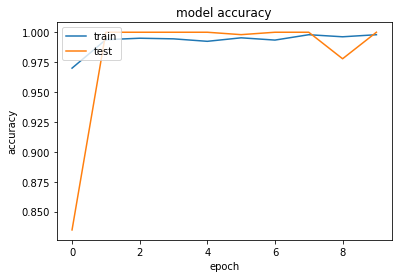

In [53]:
#visualize the results of the second model
plt.plot(training_results3.history['acc'])
plt.plot(training_results3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
#let's save these weights so we can reload them later
model3.save_weights('roadvegatation_model_10_epochs.h5')

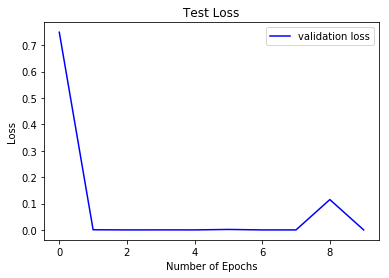

In [62]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(training_results3.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Model 2

In [11]:
# Model 2


#All filters changed to 64
#pools changed to 4,4
model32= Sequential()
model32.add(Conv2D(64, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model32.add(MaxPooling2D(pool_size=(4, 4)))

model32.add(Conv2D(64, (3, 3),activation = 'relu'))
model32.add(MaxPooling2D(pool_size=(4, 4)))

model32.add(Conv2D(64, (3, 3),activation = 'relu'))
model32.add(MaxPooling2D(pool_size=(4, 4)))

#4 layers did not work
#without removing the layer there was error


model32.add(Flatten())
#dense kernel size changed to 64
model32.add(Dense(64,activation = 'relu'))
model32.add(Dropout(0.5))
model32.add(Dense(1,activation='sigmoid'))


model32.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

# Test Model 2 

In [15]:
#number of epochs increased to 15

training_results32 = model32.fit_generator(
    train_generator,
    steps_per_epoch=number_train_examples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=number_validation_examples // batch_size)


Epoch 1/15
182/182 [==============================] - 73s 402ms/step - loss: 0.0156 - acc: 0.9974 - val_loss: 1.2429e-04 - val_acc: 1.0000
Epoch 2/15
182/182 [==============================] - 69s 380ms/step - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0100 - val_acc: 0.9980
Epoch 3/15
182/182 [==============================] - 72s 397ms/step - loss: 0.0295 - acc: 0.9961 - val_loss: 0.0048 - val_acc: 0.9980
Epoch 4/15
182/182 [==============================] - 73s 401ms/step - loss: 0.0057 - acc: 0.9995 - val_loss: 0.6602 - val_acc: 0.9194
Epoch 5/15
182/182 [==============================] - 73s 401ms/step - loss: 0.0284 - acc: 0.9961 - val_loss: 0.0173 - val_acc: 0.9980
Epoch 6/15
182/182 [==============================] - 73s 403ms/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.0321 - val_acc: 0.9980
Epoch 7/15
182/182 [==============================] - 72s 395ms/step - loss: 0.0180 - acc: 0.9974 - val_loss: 2.7271e-04 - val_acc: 1.0000
Epoch 8/15
182/182 [===========================

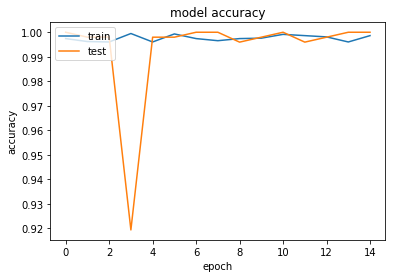

In [17]:
#visualize the results of the second model
plt.plot(training_results32.history['acc'])
plt.plot(training_results32.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#epoch 4 has a dip.

# Model 3

In [16]:
from keras.layers import GaussianNoise

model33= Sequential()
model33.add(Conv2D(64, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model33.add(MaxPooling2D(pool_size=(4, 4)))

model33.add(Conv2D(64, (3, 3),activation = 'relu'))
model33.add(MaxPooling2D(pool_size=(4, 4)))

model33.add(Conv2D(64, (3, 3),activation = 'relu'))
model33.add(MaxPooling2D(pool_size=(4, 4)))

#one layer removed
#without removing the layer there was error


model33.add(Flatten())
#dense kernel size changed to 64
model33.add(GaussianNoise(.05))
model33.add(Dense(64,activation = 'relu'))
model33.add(Dropout(0.5))
model33.add(Dense(1,activation='sigmoid'))


model33.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


# Train Model 3

In [18]:

training_results33 = model33.fit_generator(
    train_generator,
    steps_per_epoch=number_train_examples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=number_validation_examples // batch_size)

Epoch 1/20
182/182 [==============================] - 72s 397ms/step - loss: 0.0580 - acc: 0.9864 - val_loss: 0.0172 - val_acc: 0.9960
Epoch 2/20
182/182 [==============================] - 72s 397ms/step - loss: 0.0473 - acc: 0.9916 - val_loss: 5.8944e-04 - val_acc: 1.0000
Epoch 3/20
182/182 [==============================] - 72s 396ms/step - loss: 0.0670 - acc: 0.9918 - val_loss: 0.0100 - val_acc: 0.9980
Epoch 4/20
182/182 [==============================] - 71s 392ms/step - loss: 0.0401 - acc: 0.9912 - val_loss: 0.0061 - val_acc: 0.9980
Epoch 5/20
182/182 [==============================] - 87s 478ms/step - loss: 0.0223 - acc: 0.9962 - val_loss: 0.0137 - val_acc: 0.9980
Epoch 6/20
182/182 [==============================] - 75s 412ms/step - loss: 0.0183 - acc: 0.9952 - val_loss: 2.9359e-04 - val_acc: 1.0000
Epoch 7/20
182/182 [==============================] - 70s 387ms/step - loss: 0.0330 - acc: 0.9959 - val_loss: 5.2082e-06 - val_acc: 1.0000
Epoch 8/20
182/182 [=======================

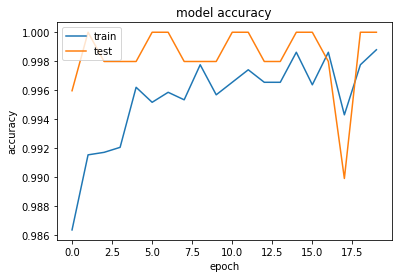

In [19]:
#visualize the results of the second model
plt.plot(training_results33.history['acc'])
plt.plot(training_results33.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#looks like accuracy varies more but axis are smaller


In [ ]:
#setting up a sequential model with 2 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flattens the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

In [43]:
#you need to compile the model before you can use it
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

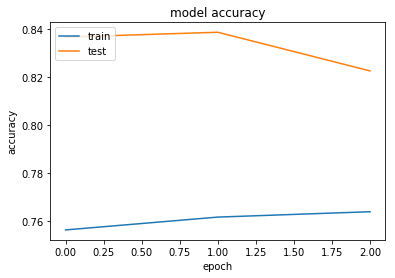

In [46]:
#using the results returned by the training history to visualize
#accuracy on the training and testing sets for each epoch
plt.plot(training_results.history['acc'])
plt.plot(training_results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#playing with code from class
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_generator, #training set
        steps_per_epoch=number_train_examples // batch_size, 
        epochs=3, #number of epochs 
        validation_data=validation_generator, #testing set
        validation_steps=number_validation_examples // batch_size 
        )

Epoch 1/3
182/182 [==============================] - 257s 1s/step - loss: 3.8680 - acc: 0.7574 - val_loss: 2.6035 - val_acc: 0.8367
Epoch 2/3
182/182 [==============================] - 256s 1s/step - loss: 3.7978 - acc: 0.7618 - val_loss: 2.5714 - val_acc: 0.8387
Epoch 3/3
182/182 [==============================] - 254s 1s/step - loss: 3.7769 - acc: 0.7631 - val_loss: 2.8285 - val_acc: 0.8226


In [47]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))


model2.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

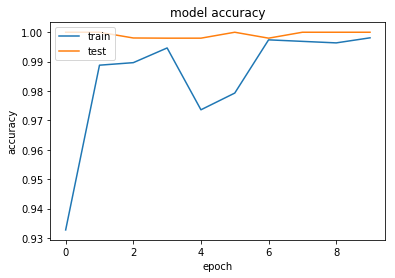

In [49]:

plt.plot(training_results2.history['acc'])
plt.plot(training_results2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:

training_results2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=number_train_examples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=number_validation_examples // batch_size)

Epoch 1/10
182/182 [==============================] - 94s 516ms/step - loss: 0.7146 - acc: 0.9330 - val_loss: 2.1366e-04 - val_acc: 1.0000
Epoch 2/10
182/182 [==============================] - 91s 501ms/step - loss: 0.1496 - acc: 0.9888 - val_loss: 3.9850e-05 - val_acc: 1.0000
Epoch 3/10
182/182 [==============================] - 91s 498ms/step - loss: 0.1111 - acc: 0.9897 - val_loss: 0.0083 - val_acc: 0.9980
Epoch 4/10
182/182 [==============================] - 92s 505ms/step - loss: 0.0449 - acc: 0.9947 - val_loss: 0.0082 - val_acc: 0.9980
Epoch 5/10
182/182 [==============================] - 92s 504ms/step - loss: 0.4267 - acc: 0.9710 - val_loss: 0.0046 - val_acc: 0.9980
Epoch 6/10
182/182 [==============================] - 90s 492ms/step - loss: 0.2771 - acc: 0.9794 - val_loss: 6.0081e-05 - val_acc: 1.0000
Epoch 7/10
182/182 [==============================] - 90s 495ms/step - loss: 0.0149 - acc: 0.9974 - val_loss: 0.0171 - val_acc: 0.9980
Epoch 8/10
182/182 [=======================